In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spec
from scipy.stats import norm
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

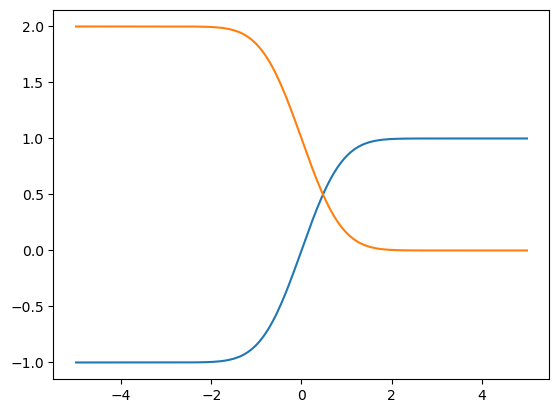

In [3]:
x=np.linspace(-5,5,201)

e=spec.erf(x)
ec=spec.erfc(x)
plt.plot(x,e)
plt.plot(x,ec)

# Gaussian CDF
https://stats.stackexchange.com/questions/187828/how-are-the-error-function-and-standard-normal-distribution-function-related

$$\Phi(x,\mu,\sigma)=\frac{1}{2}\left(1+erf\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right)$$

In [4]:
def cdf(x,m,s) :
    return 0.5*(1+spec.erf((x-m)/(s*np.sqrt(2))))

def cdfc(x,m,s) :
    return 0.5*(spec.erfc((x-m)/(s*np.sqrt(2))))

def gaussian(x,m,s) :
    return 1/(np.sqrt(2*np.pi)*s)*np.exp(-(x-m)**2/(2*s**2))

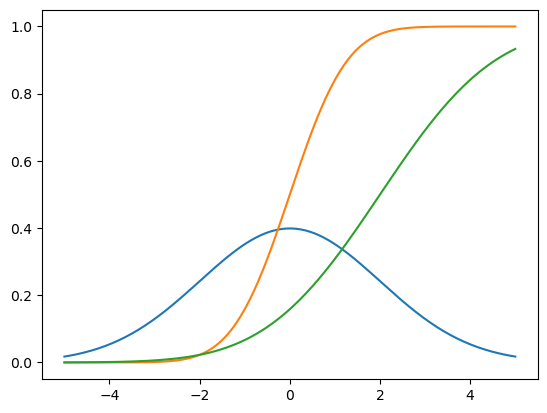

In [5]:
m0=0
s0=1
m1=2
s1=2
plt.plot(x,norm.pdf((x-m0)/(2*np.sqrt(s0))))
plt.plot(x,cdf(x,m0,s0))
plt.plot(x,cdf(x,m1,s1))

## Introduction to confidence maps

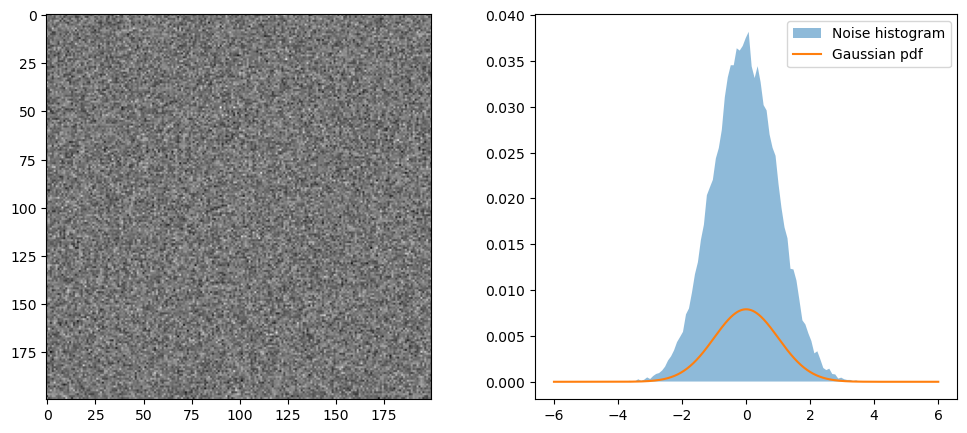

In [13]:
s0=1;
noise = np.random.normal(size=[200,200])
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].imshow(noise,cmap='gray')
h,bins = np.histogram(noise.ravel(),bins=100)
normh=h/h.sum()
ax[1].fill(bins[:-1],normh,alpha=0.5,label='Noise histogram')
pdf = gaussian(x,0,1)
ax[1].plot(x,*pdf/pdf.sum(),color=colors[1], label='Gaussian pdf')
ax[1].legend()

In [7]:
noise.std()

0.9929807584832459

In [8]:
pdf.sum()

19.99998995876672

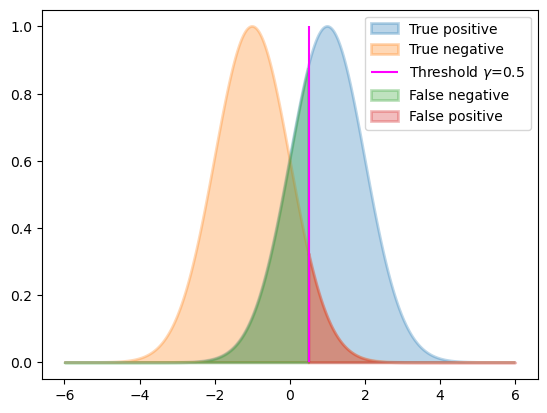

In [9]:
x=np.linspace(-6,6,1000)
h0 = np.exp(-(x-1)**2/2)
h1 = np.exp(-(x+1)**2/2)

gamma=0.5

# Visualization
gidx = np.abs(x - gamma).argmin()
plt.fill(x,h0,label='True positive',alpha=0.3,ec=colors[0],lw=2)
plt.fill(x,h1,label='True negative',alpha=0.3,ec=colors[1],lw=2)

plt.vlines([x[gidx]],ymin=0,ymax=1,color='magenta',label='Threshold $\gamma$={0}'.format(gamma))

plt.fill_between(x[:gidx],0,h0[:gidx],color=colors[2],label='False negative',alpha=0.3,ec=colors[2],lw=2)
plt.fill_between(x[gidx:],0,h1[gidx:],color=colors[3],label='False positive',alpha=0.3,ec=colors[3],lw=2)

plt.legend();

In [10]:
def conf_map(m,s) :
    if len(m) != len(s) :
        raise ValueError("Arguments have different lengths!")
        
    x_min = m.min()-3*s.max()
    x_max = m.max()+3*s.max()
    
    x=np.linspace(x_min,x_max,1000)
    
    #xx,yy = np.meshgrid(x,np.arange(len(m)))
    w = np.zeros([len(m),len(x)])
    
    for idx,(mm,ss) in enumerate(zip(m,s)) :
        w[idx]=np.exp(-(x-mm)**2/(2*ss**2))
    
    return x,w
        

In [25]:
x,w=conf_map(m=np.array([-1,1,3]),s=np.array([0.5,1.5,0.5]))

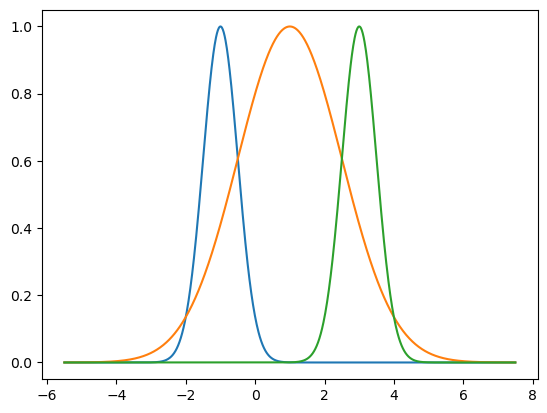

In [26]:
plt.plot(x,w.transpose());

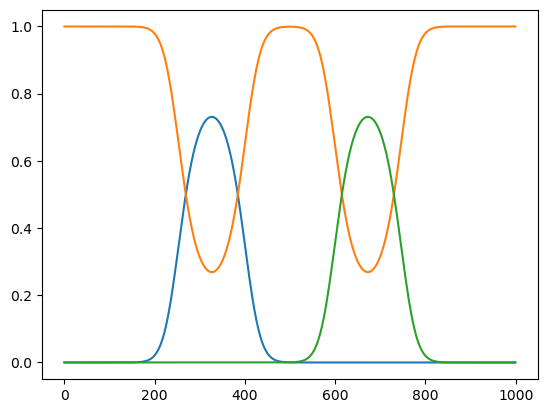

In [27]:
plt.plot(w[0]/np.sum(w,axis=0))
plt.plot(w[1]/np.sum(w,axis=0))
plt.plot(w[2]/np.sum(w,axis=0))

In [28]:
def multi_gaussian(x,m,s) :
    return np.exp(-(x-m)**2/(2*s**2))
    
    